In [32]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np 

# First cleaning of the datset

In [1]:

# Load the csv file 
dataset = pd.read_csv('book_adaptation.csv')

# Display the first few rows
dataset.head()


,movie_title,movie_release,movie_revenue,movie_runtime,movie_languages,movie_countries,movie_genres,imdb_rating,imdb_total_votes,movie_budget,...,book_thriller,book_detective,book_satire,book_comedy,book_won_price,book_rating,book_publisher,book_ratings_count,book_pages,movie_is_adaptation
0,Ghosts of Mars,2001.0,777058.028297,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",4.9,58888.0,1.552915e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,Getting Away with Murder: The JonBenét Ramsey ...,2000.0,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp...",6.1,77.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2,Brun bitter,1988.0,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D...",5.6,42.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
3,White Of The Eye,1987.0,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic...",6.1,3090.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
4,A Woman in Flames,1983.0,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}",5.9,648.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


In [2]:
dataset.describe()

,movie_release,movie_revenue,movie_runtime,imdb_rating,imdb_total_votes,movie_budget,book_release,book_part_of_series,literary_work,written_work,...,book_science_fiction,book_horror,book_thriller,book_detective,book_satire,book_comedy,book_won_price,book_rating,book_ratings_count,book_pages
count,75130.000000,9.897000e+03,6.153600e+04,63615.000000,6.361500e+04,1.769500e+04,4161.000000,5062.000000,5062.000000,5062.000000,...,5062.000000,5062.000000,5062.000000,5062.000000,5062.000000,5062.000000,5062.000000,3230.000000,3.231000e+03,3153.000000
mean,1977.492333,3.117755e+06,1.118020e+02,6.197835,1.222808e+04,6.584343e+05,1938.311944,0.115172,0.780126,0.202094,...,0.060846,0.036152,0.034571,0.049388,0.016397,0.025484,0.080798,3.886421,1.572839e+05,289.345385
std,29.090768,8.035250e+06,4.351383e+03,1.144797,7.128692e+04,1.252345e+06,54.999325,0.319261,0.414202,0.401602,...,0.239070,0.186686,0.182709,0.216697,0.127008,0.157605,0.272552,0.249760,4.168301e+05,196.087574
min,1010.000000,5.822935e-02,0.000000e+00,1.000000,5.000000e+00,4.342586e-02,1678.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00,1.000000
25%,1956.000000,1.965851e+05,8.100000e+01,5.600000,1.220000e+02,5.317417e+04,1905.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.740000,2.207000e+03,164.000000
50%,1985.000000,8.258427e+05,9.300000e+01,6.300000,5.450000e+02,2.658709e+05,1952.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.900000,1.431900e+04,257.000000
75%,2004.000000,2.778871e+06,1.060000e+02,7.000000,2.584000e+03,7.101449e+05,1981.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.060000,1.050280e+05,368.000000
max,2016.000000,2.831111e+08,1.079281e+06,10.000000,2.960759e+06,5.246682e+07,2013.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.620000,6.726008e+06,1720.000000


First we're going to correct the "movie_language", "movie_countries" and "movie_genres". Indeed, these columns contain dictionary-like structures that need to be parsed and converted into more straightforward formats

In [3]:
import ast

def parse_dict_column(column):
    """Parses a column containing dictionary-like strings and extracts the values."""
    try:
        # Safely evaluate the string to a Python dictionary
        parsed_col = ast.literal_eval(column)
        # Join the values if the evaluation returns a dictionary
        if isinstance(parsed_col, dict):
            return '; '.join(parsed_col.values())
    except (ValueError, SyntaxError):
        return column  # Return the original if parsing fails

# Apply the function to the columns
dataset['movie_languages'] = dataset['movie_languages'].apply(parse_dict_column)
dataset['movie_countries'] = dataset['movie_countries'].apply(parse_dict_column)
dataset['movie_genres'] = dataset['movie_genres'].apply(parse_dict_column)

# Check the results
dataset[['movie_languages', 'movie_countries', 'movie_genres']].head()


,movie_languages,movie_countries,movie_genres
0,English Language,United States of America,Thriller; Science Fiction; Horror; Adventure; ...
1,English Language,United States of America,Mystery; Biographical film; Drama; Crime Drama
2,Norwegian Language,Norway,Crime Fiction; Drama
3,English Language,United Kingdom,Thriller; Erotic thriller; Psychological thriller
4,German Language,Germany,Drama


One important factor to aknowledge for when analyzing data is the way we handle missing values. First, we need to see where they are mostly present

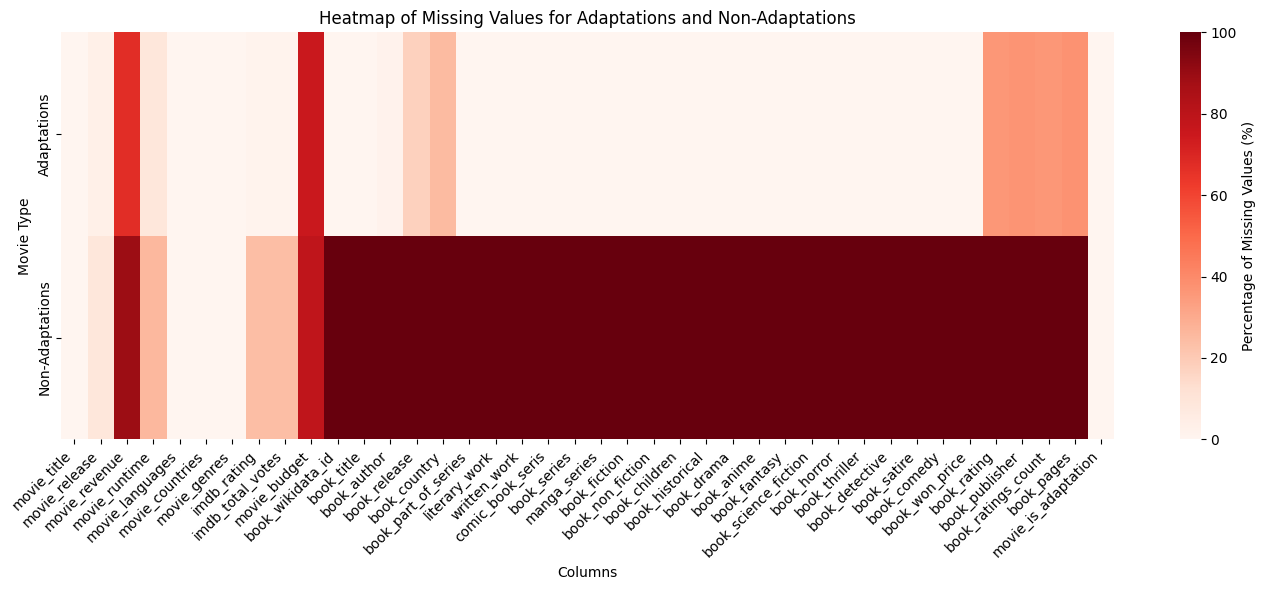

In [25]:
# Calculate missing values for movie adaptations
missing_values_adaptations = dataset[dataset['movie_is_adaptation'] == True].isnull().sum() / len(dataset[dataset['movie_is_adaptation'] == True]) * 100

# Calculate missing values for non-adaptations
missing_values_non_adaptations = dataset[dataset['movie_is_adaptation'] == False].isnull().sum() / len(dataset[dataset['movie_is_adaptation'] == False]) * 100

# Prepare data for heatmap
missing_values_df = pd.DataFrame({
    'Adaptations': missing_values_adaptations,
    'Non-Adaptations': missing_values_non_adaptations
}).T

plt.figure(figsize=(14, 6))
sns.heatmap(missing_values_df, annot=False, fmt=".1f", cmap='Reds', cbar_kws={'label': 'Percentage of Missing Values (%)'})
plt.title('Heatmap of Missing Values for Adaptations and Non-Adaptations')
plt.xlabel('Columns')
plt.ylabel('Movie Type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()


We clearly see that the critical columns to handle are the movie revenue and movie budget. For the non adaptation movies, it is normal not to have informations related to books.

## Handling movie revenue and movie budget
From what we can see, those 2 columns appear to have many missing values. In order to tackle a way to handle them, we are first going to fetch for a pattern related to the absence of value. These analyses will guide our decision on how to handle them during the analysis (e.g., removing data, imputing with a model, or focusing on subgroups with more complete data).

In [ ]:
#Analyzing missing data by movie genre

# Calculate the percentage of missing data by genre
missing_revenue_by_genre = dataset.groupby('movie_genres')['movie_revenue'].apply(lambda x: x.isna().mean() * 100)
missing_budget_by_genre = dataset.groupby('movie_genres')['movie_budget'].apply(lambda x: x.isna().mean() * 100)

# Plot the missing data by genre
plt.figure(figsize=(14, 6))
missing_revenue_by_genre.sort_values(ascending=False).plot(kind='bar', color='red', alpha=0.7, label='Missing Revenue')
missing_budget_by_genre.sort_values(ascending=False).plot(kind='bar', color='blue', alpha=0.7, label='Missing Budget')
plt.xlabel('Genre')
plt.ylabel('Percentage of Missing Data (%)')
plt.title('Percentage of Missing Revenue and Budget Data by Genre')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


/var/folders/t1/b1r79wh52p16t2dc8drzbqh80000gn/T/ipykernel_45956/3335577345.py:16: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/var/folders/t1/b1r79wh52p16t2dc8drzbqh80000gn/T/ipykernel_45956/3335577345.py:16: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


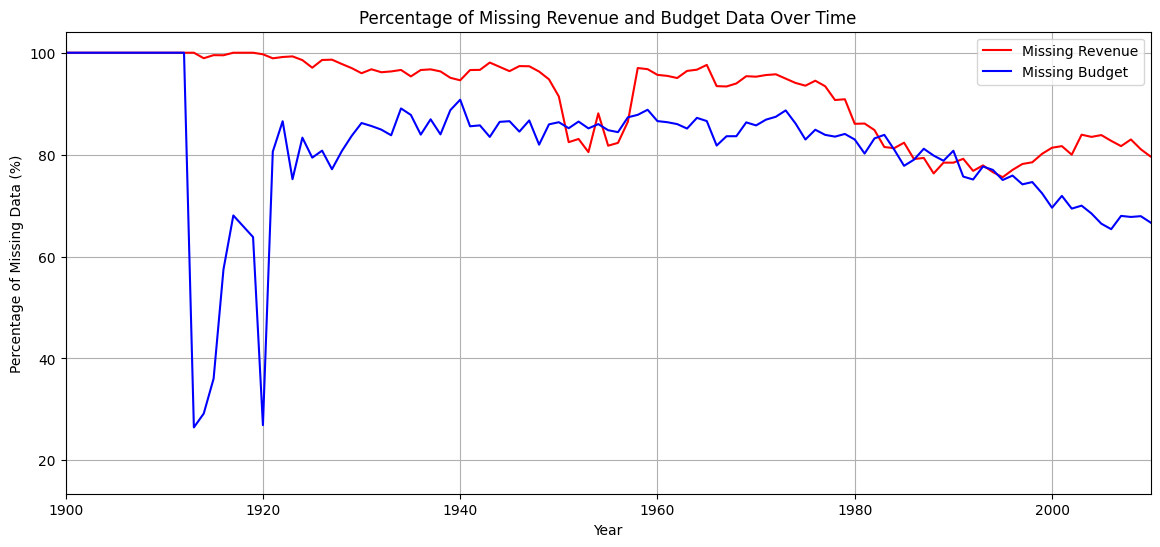

In [9]:
#Analyzing missing data over time

# Calculate the percentage of missing revenue and budget data by year
missing_revenue_by_year = dataset.groupby('movie_release')['movie_revenue'].apply(lambda x: x.isna().mean() * 100)
missing_budget_by_year = dataset.groupby('movie_release')['movie_budget'].apply(lambda x: x.isna().mean() * 100)

# Plot the missing data over time
plt.figure(figsize=(14, 6))
plt.plot(missing_revenue_by_year.index, missing_revenue_by_year, label='Missing Revenue', color='red')
plt.plot(missing_budget_by_year.index, missing_budget_by_year, label='Missing Budget', color='blue')
plt.xlabel('Year')
plt.ylabel('Percentage of Missing Data (%)')
plt.title('Percentage of Missing Revenue and Budget Data Over Time')
plt.legend()
plt.grid(True)
plt.xlim([1900, 2010])
plt.show()


# Movies based on books proportion

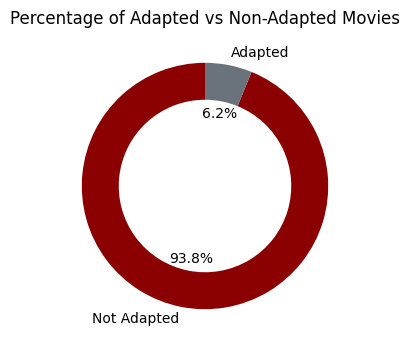

In [7]:
# Calculate the counts of adapted vs non-adapted movies
adapted_counts = dataset['movie_is_adaptation'].value_counts()
labels = ['Not Adapted', 'Adapted']

# Plot the donut chart
plt.figure(figsize=(4, 4))
plt.pie(adapted_counts, labels=labels, autopct='%1.1f%%', colors=['#8B0000', '#6a737b'], startangle=90, wedgeprops=dict(width=0.3))
plt.title('Percentage of Adapted vs Non-Adapted Movies')
plt.show()


Adapted movies represent quite a small proportion of our dataset. This low value may limit the scope of certain conclusions or analyses. One way to handle that would be to balance the data. 

# Balance Data

# Observe and handle the distributions 

For the numerical values, it is important to see how is the distribution and if it is needed to apply some kind of transformation. We're here considering :movie_revenue, movie_budget, imdb_rating, book_rating, book_pages

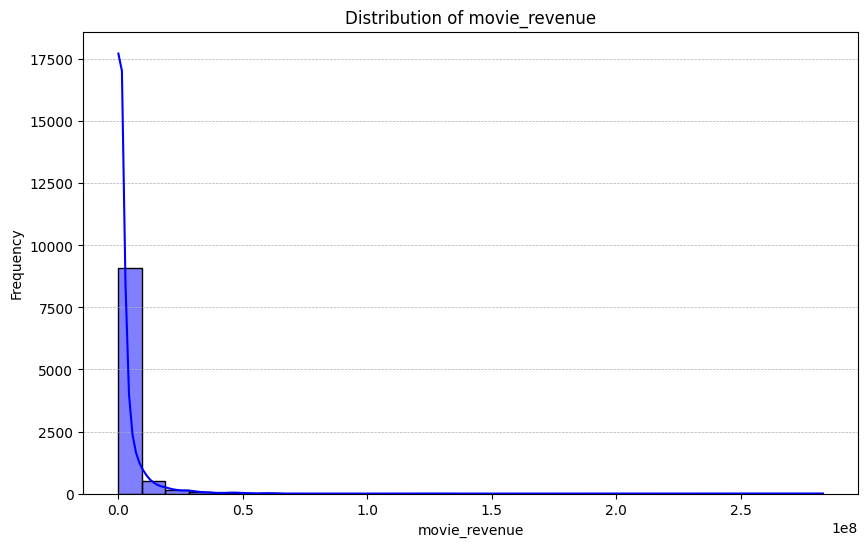

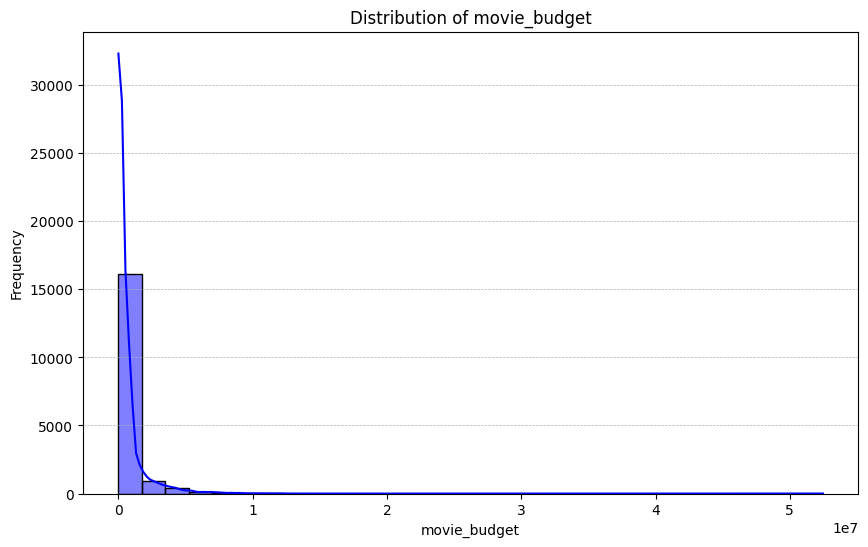

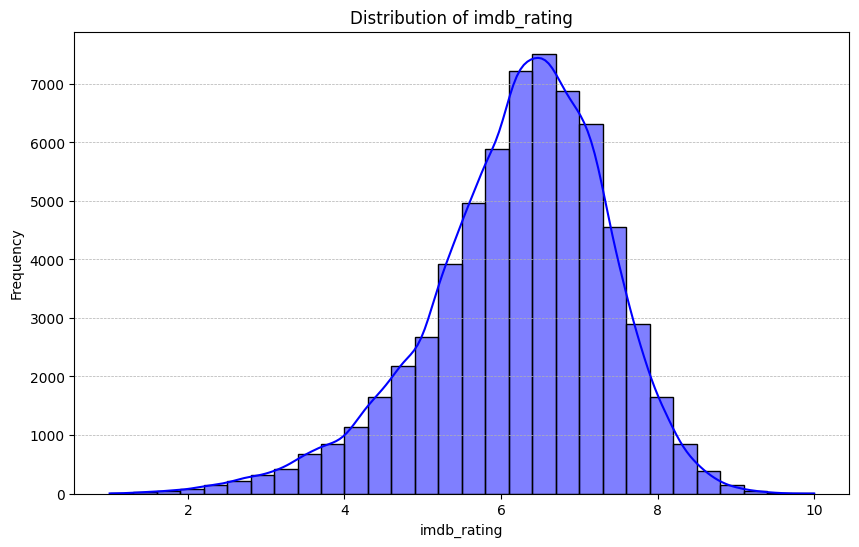

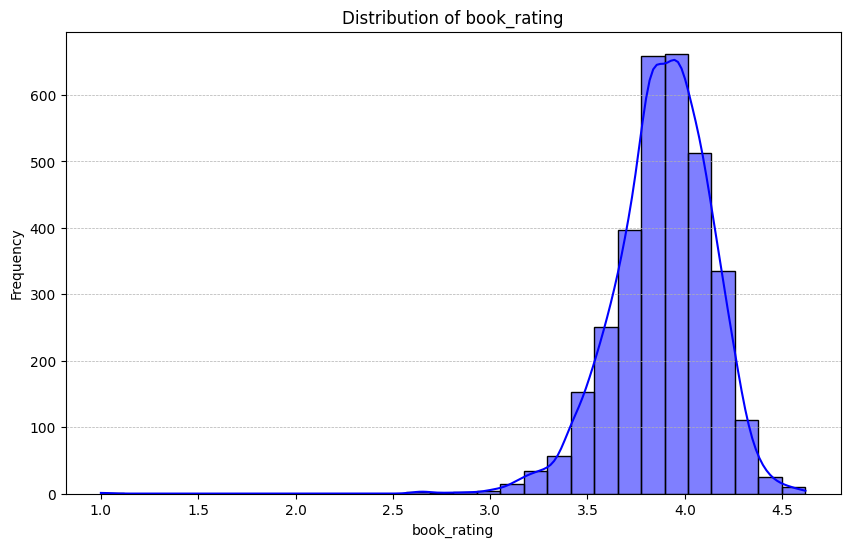

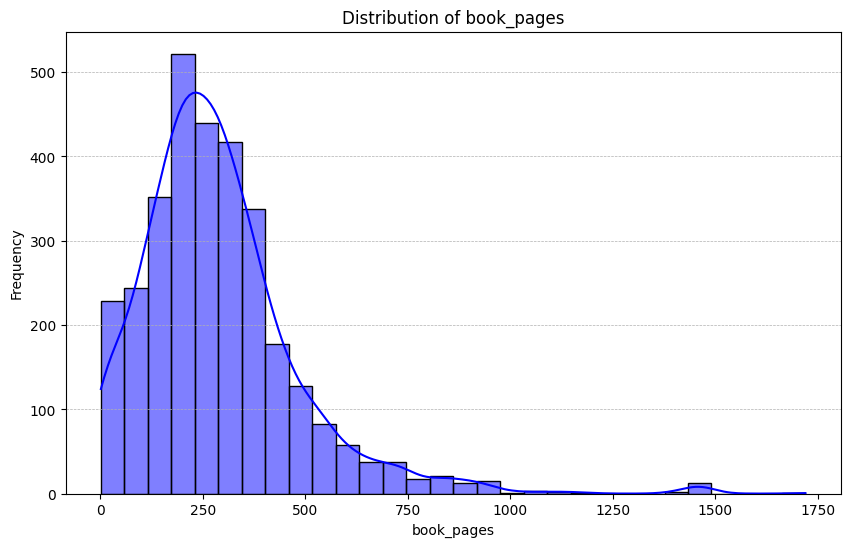

In [31]:

def plot_histograms(df, columns):
    """
    Plot histograms for given columns in a DataFrame.
    
    Parameters:
    df (DataFrame): The DataFrame containing the data.
    columns (list): List of column names for which to plot histograms.
    """
    for column in columns:
        if column in df.columns:
            plt.figure(figsize=(10, 6))
            sns.histplot(df[column].dropna(), kde=True, bins=30, color='blue')

            

            plt.title(f'Distribution of {column}')
            plt.xlabel(column)
            plt.ylabel('Frequency')
            plt.grid(axis='y', linestyle='--', linewidth=0.5)
            plt.show()
        else:
            print(f"Column '{column}' not found in the DataFrame.")

# List of columns to plot
columns_to_plot = ['movie_revenue', 'movie_budget', 'imdb_rating', 'book_rating', 'book_pages']

# Call the function with your dataset and column list
plot_histograms(dataset, columns_to_plot)


The movie revenues and movie budget show 2 heavy tails distributions. A solution one could think of would be to use the log of the values.

In [34]:
from scipy.stats import skew

skewness_revenue = dataset['movie_revenue'].skew()
skewness_budget=dataset['movie_budget'].skew()
print(f"Skewness of movie_revenue: {skewness_revenue}")
print(f"Skewness of movie_budget: {skewness_budget}")

Skewness of movie_revenue: 13.036417389434101
Skewness of movie_budget: 8.226708424133735


## VOIR SI LE FAIRE SUR DATASET OU PAS??

In [ ]:
np.log10()

# Feature engineering 

We may consider creating some features that will later serve for our analysis

In [37]:
# Time gap between movie release and book relase
dataset['time_gap'] = dataset['movie_release'] - dataset['book_release']

#measure profitability of a movie
dataset['revenue_budget_ratio'] = dataset['movie_revenue'] / dataset['movie_budget']
